<a href="https://colab.research.google.com/github/ErnestoFCh/Simulacion-I/blob/main/Sis_Inventarios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Sistema de inventarios
A continuacion simularemos un sistema de inventarios correspondiente al ejemplo 5.5.

Ademas utilizaremos el algoritmo de Hooke-Jeeves para encontrar la solución óptima

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable as pt

La demanda mensual de un cierto producto sigue la siguiente distribucion de probabilidad empirica.

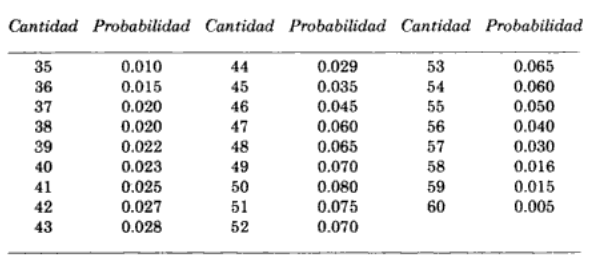

In [2]:
cantidad = [35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60]           #Esta lista es sobre las cantidades
probabilidad = [0.010,0.015,0.020,0.020,0.022,0.023,0.025,0.027,0.028,0.029,0.035,0.045,             #esta lista es sobre las probabilidades de la tabla
                0.060,0.065,0.070,0.080,0.075,0.070,0.065,0.06,0.050,0.040,0.030,0.016,0.015,0.005]

In [3]:
#Guardamos la probabilidad acumulada
p_acumulada = []
acum = 0
for i in probabilidad:
    acum= acum + i
    p_acumulada.append(acum)

In [4]:
#Devolvemos la cantidad referente a la probabilidad
def acumulada_inversa(u1=0.5):
  for i in range(len(cantidad)):
    if u1 < p_acumulada[i]:
      return cantidad[0]
    elif p_acumulada[i] <= u1 < p_acumulada[i+1]:
      return cantidad[i+1]

El tiempo de entrega esta distribuido de acuerdo a la siguiente funcion de probabilidad.


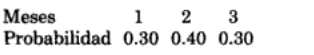

In [5]:
#Tiempos de entrega
t_entrega = [1,2,3] #En meses
p_entrega = [0.3,0.4,0.3]

Lproba_entrega = []
acum = 0
for i in p_entrega:
    acum += i
    Lproba_entrega.append(acum)

In [6]:
#Devolvemos el tiempo de entrega referente a la probabilidad
def proba_inversa(u2 = 0.5):
  for i in range(len(t_entrega)):
    if u2 < Lproba_entrega[i]:
      return t_entrega[0]
    elif  Lproba_entrega[i] <= u2 < Lproba_entrega[i + 1]:
      return t_entrega[i + 1]

Los factores estacionales para cada uno de los meses del año son como se muestra a continuacion.

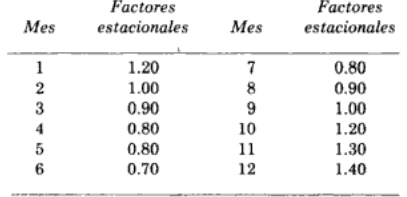

In [7]:
# Valores correspondiendtes a la tabla
factor_estacionario = [1.2, 1.0, 0.9, 0.8, 0.8, 0.7, 0.8, 0.9, 1.0, 1.2, 1.3, 1.4]

#Datos iniciales dados por el libro
No_de_unidades_a_ordenar = 200
inventario_inicial = 150
reorden = 100

In [8]:
# Variables de control
pedido_pendiente = False
tiempo_pedido_pendiente = 0
Total_de_ordenes = 0
Falta_total = 0
Total_IMP = 0

Ademas debemos considera la informacion relevante a los costos


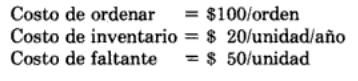

In [9]:

# Titulos correspondientes a la tabla
Tabla = pt(['Mes', 'Inv.inicial', 'No.aleatorio', 'Demanda', 'Inv.final', 'Faltante', 'Orden', 'Inv.mensual promedio'])

# Simulación del inventario
for i in range(12): #12 ya que es por mes y debe ser por año
    aux = inventario_inicial
    No_aleatorio = np.random.uniform(0, 1)
    Demanda_ajustada = int(acumulada_inversa(No_aleatorio) * factor_estacionario[i])
    inventario_final = inventario_inicial - Demanda_ajustada

    if inventario_final > 0:
      inventario_mensual_promedio = (aux + inventario_final) / 2
      Total_IMP += inventario_mensual_promedio
    else:
      inventario_mensual_promedio = round((aux / 2) * (aux / Demanda_ajustada))
      Total_IMP += inventario_mensual_promedio

    if inventario_final >= 0:
        faltante = 0
    else:
        faltante = abs(inventario_final)
        Falta_total += faltante
        inventario_final = 0

    # Aqui controlamos los pedidos pendientes
    if pedido_pendiente:
        tiempo_pedido_pendiente -= 1
        if tiempo_pedido_pendiente == 0:
            inventario_final += No_de_unidades_a_ordenar
            pedido_pendiente = False

    # Aqui evaluamos si es necesario evaluar
    if inventario_final < reorden and not pedido_pendiente:
        aleator = np.random.uniform(0, 1)
        tiempo_pedido_pendiente = proba_inversa(aleator)
        pedido_pendiente = True
        orden = 1
        Total_de_ordenes += 1
    else:
        orden = 0



    # Impresión de la tabla
    lista_tabla = [i + 1, aux, No_aleatorio, Demanda_ajustada, inventario_final, faltante, orden, inventario_mensual_promedio]
    Tabla.add_row(lista_tabla)

    inventario_inicial = inventario_final

#Imprimimos la tabla final
print(Tabla)
print("Total de ordenes:", Total_de_ordenes)
print("Falta total:", Falta_total)
print("Total de Imp:", Total_IMP)

#Aqui calculamos los costos
Costo_llevar_inventario = Total_IMP*1.67
Costo_faltante = Falta_total*50
Costo_ordenar = Total_de_ordenes*100
Costo_total = Costo_llevar_inventario + Costo_faltante + Costo_ordenar
print(' Costo total de ordenes: ',Costo_ordenar)
print(' Costo total de llevar inventario: ',Costo_llevar_inventario)
print(' Costo total de faltante: ',Costo_faltante)
print(' Costo total: ',Costo_total)

+-----+-------------+---------------------+---------+-----------+----------+-------+----------------------+
| Mes | Inv.inicial |     No.aleatorio    | Demanda | Inv.final | Faltante | Orden | Inv.mensual promedio |
+-----+-------------+---------------------+---------+-----------+----------+-------+----------------------+
|  1  |     150     | 0.49092930677211954 |    58   |     92    |    0     |   1   |        121.0         |
|  2  |      92     | 0.04042398278101411 |    37   |     55    |    0     |   0   |         73.5         |
|  3  |      55     |  0.9163226438300238 |    50   |     5     |    0     |   0   |         30.0         |
|  4  |      5      | 0.18513986112327885 |    34   |    200    |    29    |   0   |          0           |
|  5  |     200     | 0.09126310052871234 |    32   |    168    |    0     |   0   |        184.0         |
|  6  |     168     |  0.5884853622034355 |    35   |    133    |    0     |   0   |        150.5         |
|  7  |     133     |  0.516

In [14]:
#Simulamos el problema varias veces para ver cual puede ser el costo total final asi como los
# respectivos costos

#La razon del porque hacerlo es para podes estimas un valor que calcule la media de cada costo
def simulacion(No_de_unidades_a_ordenar, reorden, n=50): #se define una función cuyo parametros son las unidades a ordenar, el reorden y el numero de iteraciones
    LISTA1 = []
    LISTA2 = []
    LISTA3 = []
    LISTA4 = [] #se definen listas y variables a ocupar
    SUM1 = 0
    SUM2 = 0
    SUM3 = 0
    SUM4 = 0
    t = 1
    for i in range(n):
        factor_estacionario = [1.2, 1.0, 0.9, 0.8, 0.8, 0.7, 0.8, 0.9, 1.0, 1.2, 1.3, 1.4]
        No_de_unidades_a_ordenar = 200
        inventario_inicial = 150
        reorden = 100
        pedido_pendiente = False         #son los valores de la tabla, se mandan a llamar nuevamente
        tiempo_pedido_pendiente = 0
        Total_de_ordenes = 0
        Falta_total = 0
        Total_IMP = 0
        for j in range(12):
            aux = inventario_inicial
            No_aleatorio = np.random.uniform(0, 1)
            Demanda_ajustada = int(acumulada_inversa(No_aleatorio) * factor_estacionario[j])
            inventario_final = inventario_inicial - Demanda_ajustada

            if inventario_final > 0:
              inventario_mensual_promedio = (aux + inventario_final) / 2
              Total_IMP += inventario_mensual_promedio
            else:
              inventario_mensual_promedio = round((aux / 2) * (aux / Demanda_ajustada))
              Total_IMP += inventario_mensual_promedio

            if inventario_final >= 0:
                faltante = 0
            else:
                faltante = abs(inventario_final)
                Falta_total += faltante
                inventario_final = 0



            # Control del pedido pendiente
            if pedido_pendiente:
                tiempo_pedido_pendiente -= 1
                if tiempo_pedido_pendiente == 0:
                    inventario_final += No_de_unidades_a_ordenar
                    pedido_pendiente = False

            # Revisión de la necesidad de reordenar
            if inventario_final < reorden and not pedido_pendiente:
                aleator = np.random.uniform(0, 1)
                tiempo_pedido_pendiente = proba_inversa(aleator)
                pedido_pendiente = True
                orden = 1
                Total_de_ordenes += 1
                #print(tiempo_pedido_pendiente)
            else:
                orden = 0


            inventario_inicial = inventario_final

        Costo_llevar_inventario = Total_IMP * 1.67
        Costo_faltante = Falta_total * 50
        Costo_ordenar = Total_de_ordenes * 100
        Costo_total = Costo_llevar_inventario + Costo_faltante + Costo_ordenar

        SUM1 += Costo_ordenar
        SUM2 += Costo_llevar_inventario
        SUM3 += Costo_faltante
        SUM4 += Costo_total


        LISTA1.append(SUM1 / (t))
        LISTA2.append(SUM2 / (t))
        LISTA3.append(SUM3 / (t))
        LISTA4.append(SUM4 / (t))
        t=t+1

    return LISTA1[-1], LISTA2[-1], LISTA3[-1], LISTA4[-1]



In [15]:
# Ejecutar simulación
LIS1, LIS2, LIS3, LIS4 = simulacion(200,100,5000)
#imprimir valores
print("Costo de ordenar promedio:", LIS1)
print("Costo de llevar inventario promedio:", LIS2)
print("Costo faltante promedio:", LIS3)
print("Costo total promedio:", LIS4)

Costo de ordenar promedio: 297.9
Costo de llevar inventario promedio: 1993.921215999993
Costo faltante promedio: 2377.07
Costo total promedio: 4668.891216000008


##Algortimo Hooke-Jeeves.
El algoritmo Hooke-Jeeves, también conocido como el método de patrón de búsqueda, es un algoritmo de optimización iterativo utilizado para encontrar el mínimo (o máximo) de una función sin restricciones. Este método fue desarrollado por Robert Hooke y T. A. Jeeves en 1961 y es especialmente útil en problemas de optimización donde la función a minimizar no tiene derivadas o las derivadas son difíciles de calcular.

###Pasos del algoritmo:
Pasos del Algoritmo Hooke-Jeeves.

1.   Inicialización: Se elige un punto inicial $x_0$ y un tamaño de paso inicial Δ.

2.  Exploración:
  * Para cada dimensión de la variable $x$ se evalúa la función objetivo moviéndose una distancia Δ positiva y negativa desde el punto actual.
  * Si se encuentra una mejora, se actualiza el punto actual en esa dirección.

3. Patrón de búsqueda:
* Si se encontró una dirección de mejora durante la exploración, se realiza un movimiento más grande en esa dirección desde el nuevo punto.
* El tamaño del paso en esta fase puede ser un múltiplo del tamaño de paso original.

4. Actualización del tamaño de paso:
* Si no se encuentra ninguna mejora en la fase de exploración, se reduce el tamaño de paso Δ.


5. Convergencia:
* El proceso se repite hasta que el tamaño de paso Δ sea menor que un valor de tolerancia predefinido o se alcance un número máximo de iteraciones.

In [16]:
# Algoritmo de Hooke-Jeeves
#aqui: f, funcion a minimizar; x0, punto inicial; delta, tamaño de paso inicial; epsilon, criterio de convergencia;
def hooke_jeeves(f, x0, delta=0.5, epsilon=1e-5, max_iter=100):
    n = len(x0)
    x = np.array(x0)
    xp = np.array(x0)
    xb = np.array(x0)
    for i in range(max_iter):
        for j in range(n):
            d = np.zeros(n)
            d[j] = delta
            if f(xb + d) < f(xb):
                xb = xb + d
            elif f(xb - d) < f(xb):
                xb = xb - d
        if np.linalg.norm(xb - xp) < epsilon:
            break
        xp = xb + (xb - xp)
        if f(xp) < f(xb):
            xb = xp
        x = xb
    return xb

# Función de costo total para optimizar
def costo_total(params):
    No_de_unidades_a_ordenar, reorden = params
    _, _, _, Costo_total = simulacion(No_de_unidades_a_ordenar, reorden,1000)
    return Costo_total

# Parâmetros iniciales: [No_de_unidades_a_ordenar, reorden]
x0 = [200, 100]

# Encontrar el óptimo
optimo = hooke_jeeves(costo_total, x0)
No_de_unidades_a_ordenar_optimo, reorden_optimo = optimo

print(f"Óptimo No_de_unidades_a_ordenar: {No_de_unidades_a_ordenar_optimo}")
print(f"Óptimo reorden: {reorden_optimo}")

# Calcular los costos con los valores óptimos
Costo_ordenar_optimo, Costo_llevar_inventario_optimo, Costo_faltante_optimo, Costo_total_optimo = simulacion(No_de_unidades_a_ordenar_optimo, reorden_optimo)
print(f"Costo a ordenar óptimo: {Costo_ordenar_optimo}")
print(f"Costo de llevar el inventario óptimo: {Costo_llevar_inventario_optimo}")
print(f"Costo faltante óptimo: {Costo_faltante_optimo}")
print(f"Costo total óptimo: {Costo_total_optimo}")

Óptimo No_de_unidades_a_ordenar: 201.0
Óptimo reorden: 102.0
Costo a ordenar óptimo: 296.0
Costo de llevar el inventario óptimo: 2005.1522999999997
Costo faltante óptimo: 2232.0
Costo total óptimo: 4533.1523


In [18]:
#Comparacion por simulacion y algoritmo:
print("Datos por simulacion: ")
print("Costo de ordenar promedio:", LIS1)
print("Costo de llevar inventario promedio:", LIS2)
print("Costo faltante promedio:", LIS3)
print("Costo total promedio:", LIS4)
print("")
print("Datos por algoritmo: ")
print(f"Costo a ordenar óptimo: {Costo_ordenar_optimo}")
print(f"Costo de llevar el inventario óptimo: {Costo_llevar_inventario_optimo}")
print(f"Costo faltante óptimo: {Costo_faltante_optimo}")
print(f"Costo total óptimo: {Costo_total_optimo}")

Datos por simulacion: 
Costo de ordenar promedio: 297.9
Costo de llevar inventario promedio: 1993.921215999993
Costo faltante promedio: 2377.07
Costo total promedio: 4668.891216000008

Datos por algoritmo: 
Costo a ordenar óptimo: 296.0
Costo de llevar el inventario óptimo: 2005.1522999999997
Costo faltante óptimo: 2232.0
Costo total óptimo: 4533.1523


Nota: El presente algoritmo se hizo en colaboracion con el compañero Ventura Fernandez Zahib Gamaliel.